In [ ]:
import pandas as pd
import numpy as np
df=pd.read_excel('Normtemp.xls')
df.head()

,Body Temp,Gender,Heart Rate
0,96.3,2,70
1,96.7,2,71
2,96.9,2,74
3,97.0,2,80
4,97.1,2,73


In [ ]:
x=df[['Body Temp','Gender','Heart Rate']]
y=df[['Body Temp']]
x.head()

,Body Temp,Gender,Heart Rate
0,96.3,2,70
1,96.7,2,71
2,96.9,2,74
3,97.0,2,80
4,97.1,2,73


In [ ]:
df.shape

(130, 3)

In [ ]:
cov=df.cov()
cov


,Body Temp,Gender,Heart Rate
Body Temp,0.537558,-0.072868,1.313381
Gender,-0.072868,0.251938,-0.197674
Heart Rate,1.313381,-0.197674,49.872928


In [ ]:
cov.shape

(3, 3)

In [ ]:
corr=df.corr()
corr

,Body Temp,Gender,Heart Rate
Body Temp,1.000000,-0.198006,0.253656
Gender,-0.198006,1.000000,-0.055766
Heart Rate,0.253656,-0.055766,1.000000


In [ ]:
eig_values,eig_vectors=np.linalg.eig(cov)
print('eigenvectors \n%s' %eig_vectors)

eigenvectors 
[[-0.02659852  0.96937985  0.24412133]
 [ 0.00401841 -0.24410208  0.96974122]
 [-0.99963812 -0.02677466 -0.00259739]]


In [ ]:
eig_values
eig_values=np.sort(eig_values)
print('\n eigen values\n%s' %np.sort(eig_values))


 eigen values
[ 0.2341237   0.51963057 49.90866911]


In [ ]:
eig_vectors.T[0]
eig_vectors.T[1]

array([ 0.96937985, -0.24410208, -0.02677466])

In [ ]:
pca1=x.dot(eig_vectors.T[0])
pca2=x.dot(eig_vectors.T[1])

In [ ]:
pca1=x.dot(eig_vectors.T[0].T).T
pca2=x.dot(eig_vectors.T[1].T).T

In [ ]:
result=pd.DataFrame({'pca1':pca1,'pca2':pca2})
result[['Body Temp']]=y
result.head()

,pca1,pca2,Body Temp
0,-72.528069,90.988849,96.3
1,-73.538347,91.349826,96.7
2,-76.542581,91.463378,96.9
3,-82.543069,91.399668,97.0
4,-75.548262,91.684029,97.1


Text(0.5, 1.0, 'PCA result')

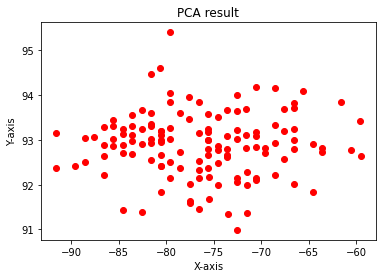

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(pca1, pca2, c="r", marker='o')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('PCA result')